<a href="https://colab.research.google.com/github/ishankarve/meta_analysis/blob/main/met_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
# import libraries
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [203]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [204]:
# import data
met_df = pd.read_csv("https://raw.githubusercontent.com/ishankarve/meta_analysis/main/metadata.csv", na_values=np.nan)

In [205]:
# prevent result truncation
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [206]:
# check shape of the dataframe
met_df.shape

(320, 16)

In [207]:
# check sample dataframe
met_df.head(50)

,DATE,TIME,F/L (ft),LCL,CCL,LFC,TTI,KI,LI,SI,BI,HI,DCI,SWEAT,CAPE,TS
0,03/06/2019,1630,"16,145",950,933,885,43.0,24.7,-7.3,1.1,95.8,25.3,44.6,-7.9,-,TS
1,04/06/2019,430,"16,790",972,943,895,38.4,27.9,-6.9,4.5,95.9,20.5,36.3,26.9,-,NaN
2,11/08/2019,1630,"16,585",938,-,-,44.7,28.4,-5.5,-1.0,95.1,20.7,45.1,76.2,-,NaN
3,12/08/2019,530,"16,134",996,970,970,41.8,30.3,-4.0,0.4,93.5,10.4,37.6,157.0,1358.9,NaN
4,14/08/2019,530,"16,401",958,950,947,42.3,29.0,-4.3,0.3,98.5,14.2,41.0,208.8,-,NaN
5,27/08/2019,1630,"17,892",943,938,936,38.5,34.4,-2.5,1.8,92.6,5.4,40.6,-81.5,NaN,NaN
6,28/08/2019,1730,"17,605",952,942,935,37.8,66.4,-2.4,2.6,93.9,12.5,4.6,48.1,1930.6,NaN
7,04/09/2019,530,"16,952",982,920,850,41.1,35.2,-1.5,1.0,90.6,6.2,36.8,122.3,404.5,NaN
8,05/09/2019,630,"16,675",982,940,965,40.7,33.8,-2.1,1.3,95.7,10.6,37.0,-3.7,-,TS
9,06/09/2019,430,"16,496",950,925,965,40.2,34.8,-1.5,1.3,96.0,9.6,39.6,-15.1,-,NaN


In [208]:
# check basic dataframe numeric properties
met_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TIME,320.0,1011.906250,641.207563,330.0,430.00,530.0,1730.000,2330.0
TTI,320.0,39.417500,5.269693,18.8,37.60,40.0,42.325,51.9
KI,320.0,21.083750,14.846174,-30.5,11.00,26.8,32.025,66.4
LI,320.0,-1.414375,3.635610,-10.5,-3.60,-2.0,0.700,14.3
SI,320.0,2.796563,3.385015,-16.7,0.80,2.4,4.400,14.9
BI,318.0,94.564780,6.778698,9.1,93.70,95.3,96.575,103.1
HI,319.0,42.175235,24.546631,0.1,19.10,43.2,61.000,118.0
SWEAT,320.0,-18.380312,165.573275,-714.0,-111.65,1.5,94.875,370.6


In [209]:
# check object type of dataframe
met_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      320 non-null    object 
 1   TIME      320 non-null    int64  
 2   F/L (ft)  320 non-null    object 
 3   LCL       320 non-null    object 
 4   CCL       320 non-null    object 
 5   LFC       317 non-null    object 
 6   TTI       320 non-null    float64
 7   KI        320 non-null    float64
 8   LI        320 non-null    float64
 9   SI        320 non-null    float64
 10  BI        318 non-null    float64
 11  HI        319 non-null    float64
 12  DCI       320 non-null    object 
 13  SWEAT     320 non-null    float64
 14  CAPE      319 non-null    object 
 15  TS        45 non-null     object 
dtypes: float64(7), int64(1), object(8)
memory usage: 40.1+ KB


In [210]:
# get percentage of null values per column
missing_info_df = met_df.isnull().sum() / met_df.shape[0] * 100.00
missing_info_df = pd.DataFrame({'columns':missing_info_df.index, 'percent_missing':missing_info_df.values})
missing_info_df.sort_values(by='percent_missing', ascending=False)

,columns,percent_missing
15,TS,85.9375
5,LFC,0.9375
10,BI,0.6250
11,HI,0.3125
14,CAPE,0.3125
0,DATE,0.0000
1,TIME,0.0000
2,F/L (ft),0.0000
3,LCL,0.0000
4,CCL,0.0000


In [211]:
# extrate date/month/year from date column and append the column to the dataframe
met_df['day'] = pd.to_datetime(met_df['DATE'], format='%d/%m/%Y', errors='ignore').dt.day
met_df['month'] = pd.to_datetime(met_df['DATE'], format='%d/%m/%Y', errors='ignore').dt.month
met_df['year'] = pd.to_datetime(met_df['DATE'], format='%d/%m/%Y', errors='ignore').dt.year

In [212]:
met_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      320 non-null    object 
 1   TIME      320 non-null    int64  
 2   F/L (ft)  320 non-null    object 
 3   LCL       320 non-null    object 
 4   CCL       320 non-null    object 
 5   LFC       317 non-null    object 
 6   TTI       320 non-null    float64
 7   KI        320 non-null    float64
 8   LI        320 non-null    float64
 9   SI        320 non-null    float64
 10  BI        318 non-null    float64
 11  HI        319 non-null    float64
 12  DCI       320 non-null    object 
 13  SWEAT     320 non-null    float64
 14  CAPE      319 non-null    object 
 15  TS        45 non-null     object 
 16  day       320 non-null    int64  
 17  month     320 non-null    int64  
 18  year      320 non-null    int64  
dtypes: float64(7), int64(4), object(8)
memory usage: 47.6+ KB


In [213]:
# replace "-" in dataframe with NaN across dataframe
met_df = met_df.applymap(lambda x: np.nan if x == '-' else x)

In [214]:
#impute comma from ft and convert to decimal
met_df['F/L (ft)'] = met_df['F/L (ft)'].astype(str).apply(lambda x: x.replace(",", "" ))
met_df['LCL'] = met_df['LCL'].astype(str).apply(lambda x: x.replace(",", "" ))

In [215]:
# impute TS column with 1 for all row having value TS and 0 otherwise and convert it to int
met_df['TS'] = met_df['TS'].astype(str).replace("TS",1)
met_df['TS'] = met_df['TS'].astype(str).apply(lambda x: 0 if x == "nan" else x)
met_df['TS'] = met_df['TS'].astype(str).astype(int)

In [216]:
met_df['TS'] = met_df['TS'].astype(str).astype(int)

In [217]:
met_df['DCI'] = met_df['DCI'].astype(str).apply(lambda x: x.replace("..", "." ))
met_df['DCI'] = met_df['DCI'].astype(str).astype(float)

In [218]:
met_df['LFC'] = met_df['LFC'].apply(lambda x: "" if x == "nan" else x)

In [219]:
met_df['CCL'] = met_df['CCL'].astype(str).astype(float)
met_df['LFC'] = met_df['LFC'].astype(str).astype(float)
met_df['LCL'] = met_df['LCL'].astype(str).astype(float)
met_df['CAPE'] = met_df['CAPE'].astype(str).astype(float)

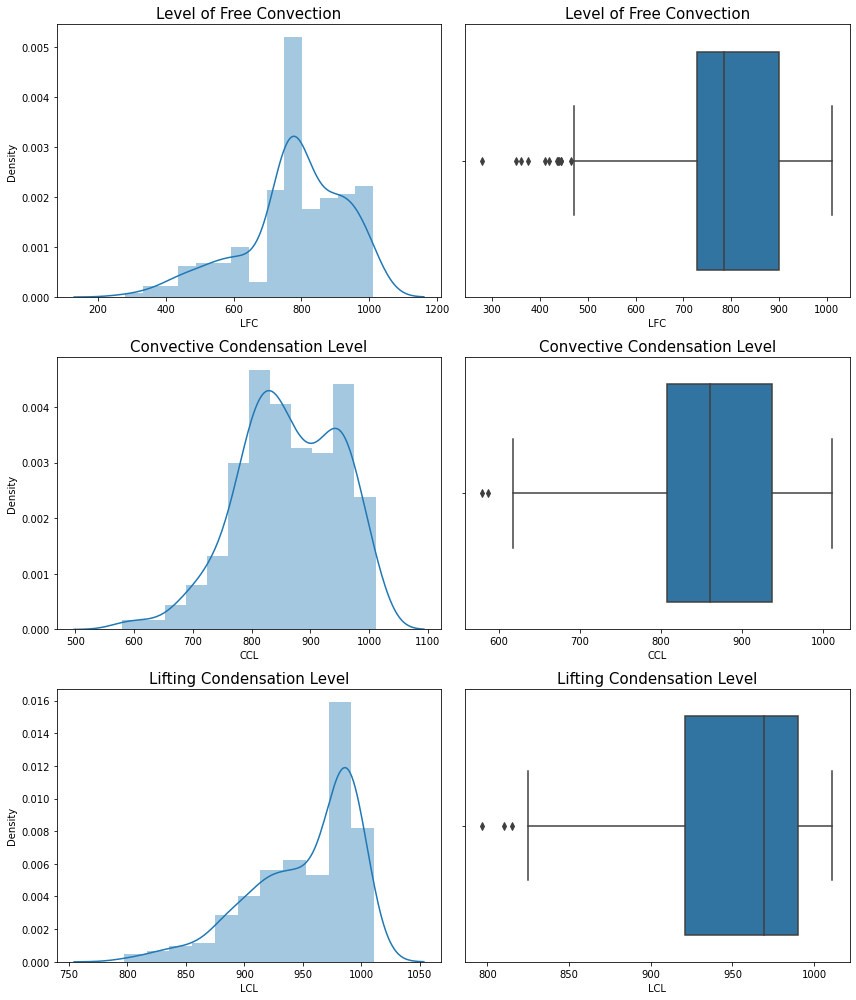

In [220]:
# before we impute values of missing rows across columns, we need to undertake univariate analysis

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(met_df['LFC'] , ax=axes[0][0])
a.set_title("Level of Free Convection",fontsize=15)

a = sns.boxplot(met_df['LFC'] , orient = "v" , ax=axes[0][1])
a.set_title("Level of Free Convection",fontsize=15)


a = sns.distplot(met_df['CCL'] , ax=axes[1][0])
a.set_title("Convective Condensation Level",fontsize=15)

a = sns.boxplot(met_df['CCL'] , orient = "v" , ax=axes[1][1])
a.set_title("Convective Condensation Level",fontsize=15)


a = sns.distplot(met_df['LCL'] , ax=axes[2][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['LCL'] , orient = "v" , ax=axes[2][1])
a.set_title("Lifting Condensation Level",fontsize=15)

plt.tight_layout()

In [221]:
# since there are very few outliers we shal impute the missing values with median values

In [222]:
met_df['CCL'].fillna(met_df['CCL'].median(), inplace=True)
met_df['LCL'].fillna(met_df['LCL'].median(), inplace=True)
met_df['LFC'].fillna(met_df['LFC'].mean(), inplace=True)

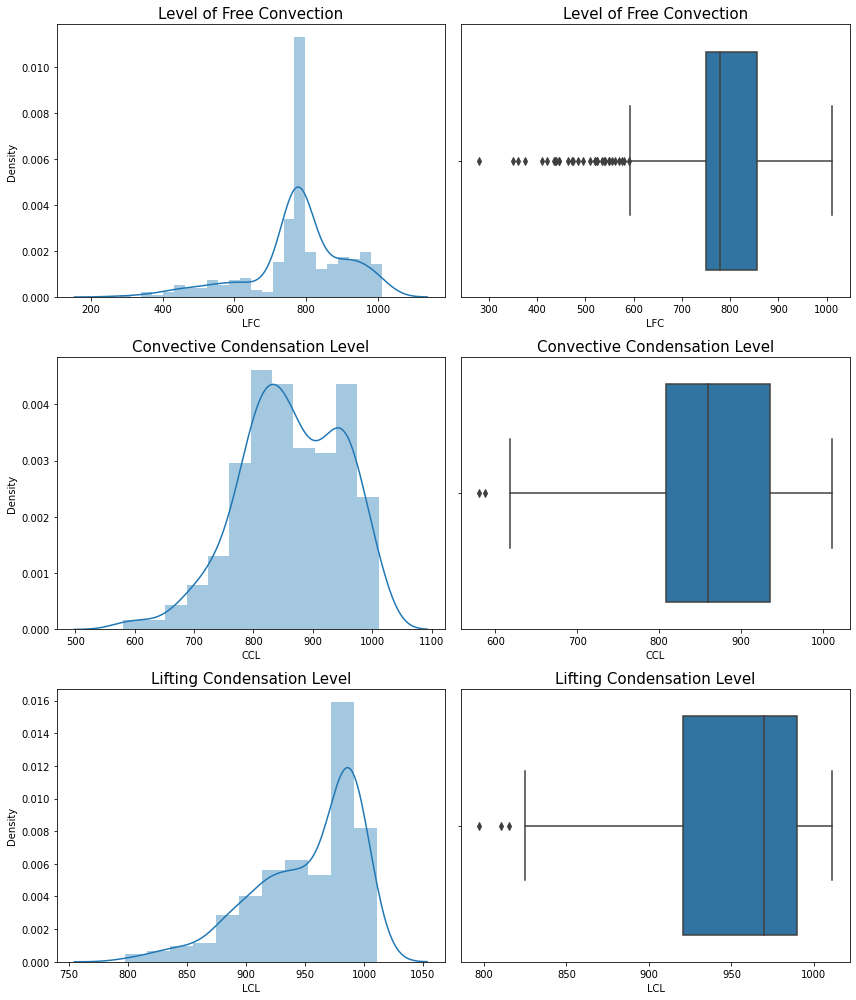

In [223]:
# check distributon of values again

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(met_df['LFC'] , ax=axes[0][0])
a.set_title("Level of Free Convection",fontsize=15)

a = sns.boxplot(met_df['LFC'] , orient = "v" , ax=axes[0][1])
a.set_title("Level of Free Convection",fontsize=15)


a = sns.distplot(met_df['CCL'] , ax=axes[1][0])
a.set_title("Convective Condensation Level",fontsize=15)

a = sns.boxplot(met_df['CCL'] , orient = "v" , ax=axes[1][1])
a.set_title("Convective Condensation Level",fontsize=15)


a = sns.distplot(met_df['LCL'] , ax=axes[2][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['LCL'] , orient = "v" , ax=axes[2][1])
a.set_title("Lifting Condensation Level",fontsize=15)

plt.tight_layout()

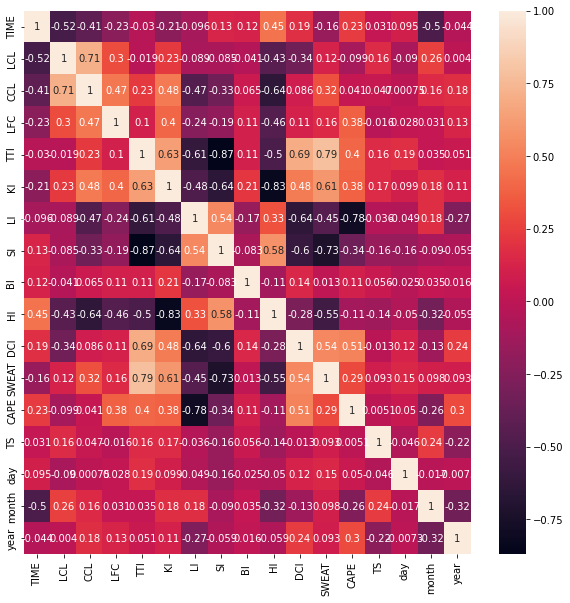

In [224]:
# Visualising correlation matrix 
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(met_df.corr(),annot = True)
plt.show()

**Prepare Data for Regression**

In [ ]:
#drop not required columns



In [227]:
# splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(666)
s1_train, s1_test = train_test_split(met_df, train_size = 0.7, test_size = 0.3, random_state = 100)